# 회귀Regression(1)

회귀분석: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법  

Y = W1* X1+W2* X2 ...  
W1, W2 > 독립변수 값에 영향을 미치는 회귀계수(Regression cofficients)  

머신러닝 회귀 예측의 핵심은 피처, 결정값 데이터 기반에서 학습을 통해 **최적의 회귀 계수**를 찾아내는 것

- 회귀 계수의 결합: 선형 회귀/비선형 회귀
- 독립변수의 개수: 단일 회귀/다중 회귀  
  
**분류와의 예측 결과값 차이점**
- 분류: Category값(이산)
- 회귀: 숫자(연속)값

**선형 회귀**: 실제 값과 예측값이 차이(오류의 제곱)를 최소화하여 직선형 회귀선을 최적화하는 방식  
**규제(Regularization)**: 선형 회귀의 과적합 문제를 해결하기 위해 회귀 계수에 페널티 값을 적용

- 일반 선형 회귀: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않음
- 로지스틱 회귀: 분류에 사용되는 선형 모델. 이준 분류뿐만 아니라 희소 영역(ex.텍스트 분류)에서 뛰어난 예측 성능

## 단순 선형 회귀를 통한 회귀 이해

**Y = w0+w1* X1**  
<img src='https://miro.medium.com/max/2872/1*k2bLmeYIG7z7dCyxADedhQ.png' width=50%>
종속변수에 영향을 주는 독립변수의 수가 1개이며, 두 변수 사이의 관계가 직선인 경우.  
오류의 단순 합은 크게 줄어들 수 있으므로 절댓값을 취해 더하거나(Mean Absolute Error) 오류의 제곱(RSS)을 더한다.  

**RSS**
- 변수가 w0, w1인 식으로 표현할 수 있으며 RSS를 최소로 하는 회귀 계수를 학습을 통해 찾아야 함
- **중심 변수는 w변수(회귀계수)**
- 회귀에서 RSS는 비용(Cost)이며 w로 구성되는 RSS를 비용 함수(or loss function)라고 함

## 경사하강법(Gradient Descent)

<img src='https://miro.medium.com/max/1400/1*tQTcGTLZqnI5rp3JYO_4NA.png'>

**경사 하강법의 프로세스**
1. w1, w0을 임의의 값으로 설정, 첫 비용 함수의 값 계산  
2. w1, w2를 보정계수(학습률)를 곱한 식으로 업데이트 후 다시 비용 함수의 값 계산
3. 비용 함수의 값이 감소하지 않을 때까지 위 프로세스 반복

y = 4X+6 을 근사하기 위한 경사하강법

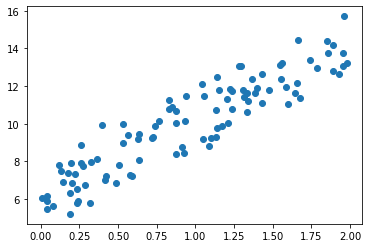

In [2]:
#데이터 생성
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X = 2*np.random.rand(100,1)
y=6+4*X+np.random.randn(100,1)

plt.scatter(X,y)

In [4]:
# 비용함수 정의
# 실제 y값과 예측된 y값을 인자로

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

경사하강법 함수를 생성하여 구현. gradient_descent()는 w1, w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하며 업데이트.  
넘파이의 내적 연산 dot()를 이용하여 y_pred=np.dot(X, w1, T)+w0로 예측 배열값 계산

In [12]:
# 업데이트 할 w1/w0_update 반환

def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    
    # 동일한 크기를 가진 0값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    #예측 배열 계산
    y_pred = np.dot(X,w1.T)+w0
    diff = y-y_pred
    
    #w0 update를 dot 행렬 연산하기 위한 all 1값인 행렬 생성
    w0_factors = np.ones((N,1))
    
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [13]:
# iters로 주어진 횟수만큼 반복적으로 w1, w0 업데이트 적용

def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # iters만큼 반복적으로 호출하여 w1, w0 업데이트
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [14]:
# 예측값, 실제값의 RSS 차이 계싼

def get_cost(y, y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 10000)
print('w1:{0:.3f}, w0:{0:.3f}'.format(w1[0,0], w0[0,0]))

y_pred = w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.968, w0:3.968
Gradient Descent Total Cost:0.9924


실제 선형식인 4X+6과 비슷하게 도출.

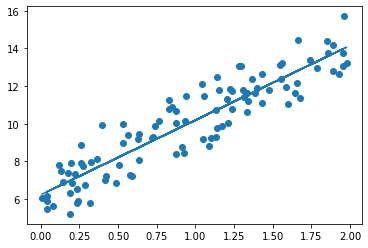

In [15]:
plt.scatter(X,y)
plt.plot(X, y_pred)

Standard 경사하강법은 수행 시간이 오래 걸린다는 단점. 실전에서는 확률적 경사 하강법 사용.  

**확률적 경사 하강법(Stochastic Gradient Descent)**
- 일부 데이터만 이용해 w가 업데이트되는 값 계산.
- X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출하여 update 계산

In [22]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        
        #데이터에서 배치 사이즈만큼 추출하여 sample 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1-w1_update
        w0 = w0-w0_update
        
    return w1, w0

예측 오류 비용 게산

In [23]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0],3), "w0:", round(w0[0,0],3))

y_pred = w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


## 사이킷런 Linear Regression을 이용한 보스턴 주택 가격 예측

### Linear Regression - Ordinary Least Squares
- 예측값과 실제 값의 RSS를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현.  
- fit() 으로 X, y 배열을 입력받으면 회귀계수인 W를 coef_ 속성에 저장
 
class sklearn.linear_model.LinearRegressoin(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)  

**입력 파라미터**  
- **fit_intercept**: intercept(절편) 값을 계산할지, False면 0으로 지정
- **normalize**: True면 회귀 수행 전 데이터 정규화 필요

**속성**  
- **coef_**: fit()을 수행할 때 회귀 계수가 배열 형태로 저장. Shape는 (Target 값 개수, 피처 개수)
- **intercept_**

OLS 기반의 회귀 계수는 입력 피처의 독립성에 많은 영향을 받음.  

**다중 공선성(multi-collinearity) 문제**  
- 피처간 상관관계가 높은 경우 분산이 커져 오류에 매우 민감해짐
- 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
- 많은 피처가 다중 공선성 문제가 있다면 PCA를 통해 축소 수행 고려 가능

### 회귀 평가 지표
실제 값과 회귀 예측값의 차이 값을 기반으로 한 지표 중심

- MAE: 절대값 변환
- MSE: 제곱의 평균
- RMSE: root MSE
- R2: 분산 기반. 실제 값의 분산 대비 예측값의 분산 비율

|평가 방법|사이킷런 평가 지표 API|Scoring 함수 적용 값|
|----|---|---|
|MAE|metrics.mean_absolute_error|neg_mean_absolute_error|
|MSE|metrics.mean_squared_error|neg_mean_squared_error|
|R^2|metrics.r2_score|r2|

MAE Scoring 함수 적용 값의 neg는 음수로, 사이킷런의 Scoring 함수는 값이 클수록 좋은 평가 결과로 자동 변환하기 때문에 사용.

### 보스턴 주택 가격 데이터

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

#boston 데이터의 target 배열은 주택 가격
bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


각 칼럼이 회귀에 미치는 영향
- **regplot()**: seaborn API. X, Y축 값의 산점도와 같이 선형 회귀 직선을 그림
- **matplotlib.subplots(ncols, nrows)**: 여러 그래프를 한번에 표현.

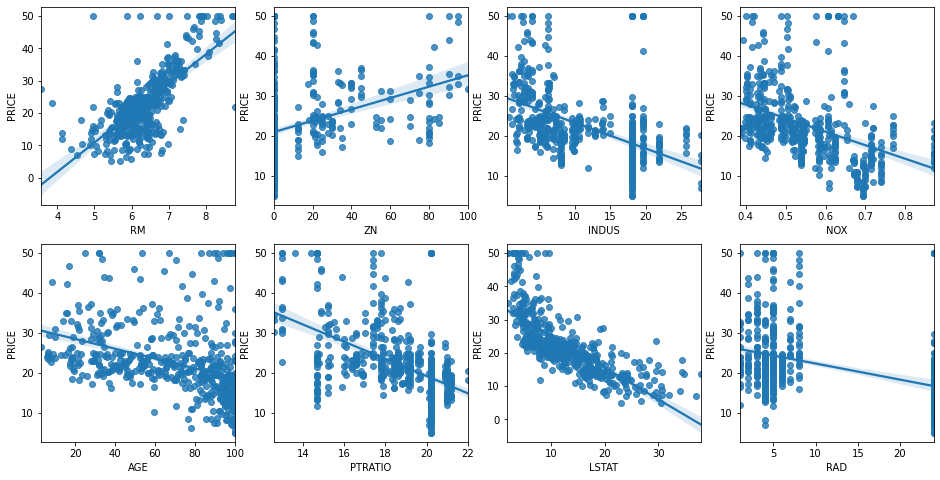

In [26]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# 선형회귀 OL로 학습/예측/수행
lr = LinearRegression()
lr.fit(X_train ,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE:0.757, RMSE:0.757


In [34]:
print('절편 값', lr.intercept_)
print('회귀계수값', np.round(lr.coef_, 1))

절편 값 40.995595172164336
회귀계수값 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


coef_는 회귀계수의 값만 가지고 있기 때문에 피처별 회귀 계수 값으로 다시 매핑

In [37]:
# 회귀계수를 큰 값으로 정렬하기 위해 Sereis로 생성
coeff = pd.Series(data = np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

cross_val_score()은 교차 검증으로 RMSE를 제공하지 않기 때문에 계산된 MSE에 -1을 곱하여 원 수치로 돌리고, RMSE로 변환한다.

In [38]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# 5폴드 세트로 MSE구한 뒤 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 반환된 값은 모두 음수
print('5 fold의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 fold의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 fold의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 fold의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 fold의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 fold의 평균 RMSE: 5.829


## 다항 회귀와 과대적합/과소적합 이해

### 다항Polynomial 회귀
- 다항식으로 표현 
- **선형 회귀** (선형 회귀의 기준: 회귀 계수의 선형 여부)

사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않음.  
PolynomialFeatures(degree) 클래스를 통하여 다항식 피처로 변환. fit(), transform()을 통해 수행.

In [40]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처:\n',X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


단항식을 바꿀 때 [1, x1, x2, x1^, x1x2, x2^] 으로 바뀌는 것 확인

3차 다항 함수 계수 피처 값이 입력되면 결정 값을 반환

In [41]:
def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)

y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


PolynomialFeatures(degree=3)은 단항 계수 피처 x1. x2를 3차 다항 계수 > 10개의 다항 계수로 변환  
**PolynomialFeatures로 피처를 변환 후 LinearRegression 클래스를 사용하여 다항 회귀를 구현**

In [42]:
# 3차 다항식 변화
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항삭 계수 feature:\n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)

print('Polynomial 회귀계수:\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:\n', model.coef_.shape)

3차 다항삭 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:
 (10,)


In [45]:
# 피처 변환과 선형 회귀 적용을 한번에 Pipeline객체를 이용해 구현하는 것이 명료

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

# Pipe line으로 Streamline하게 피처변환과 회귀 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

- 다항식의 차수가 높아질수록 과적합 문제 발생  

다음은 이를 보여주는 예제)  
본래 데이터 세트: 피처 X와 target y가 Noise가 포함된 다항식의 Cosine 그래프 관계  
다항 회귀의 차수를 변화시키며 정확도를 비교

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# cosine 값 반환
def true_fun(X):
    return np.cos(1.5*np.pi*X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples)) # rand.난수생성

y = true_fun(X)+np.random.randn(n_samples)*0.1 #add Noise

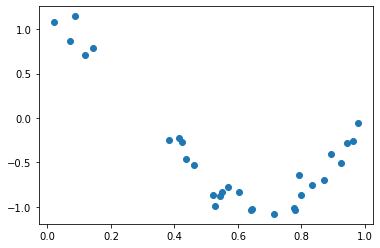

In [47]:
plt.scatter(X, y)


 Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

 Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

 Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417100e+06  2.03717220e+07
 -1.44873987e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.48 입니다.


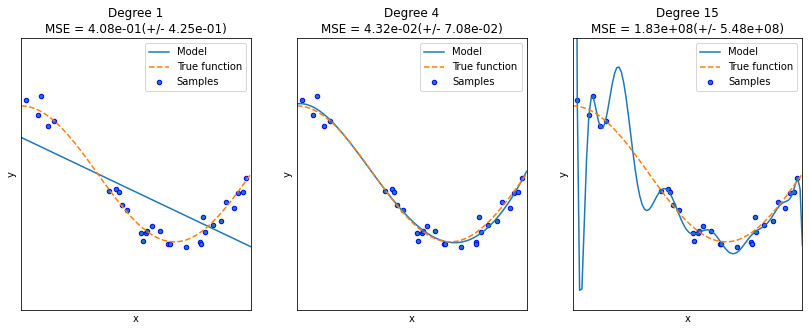

In [51]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 차수 변화, 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    
    # 세부 객체를 접근하는 named_steps['객체명']으로 회귀계수 추출
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\n Degree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    X_test = np.linspace(0, 1, 100)
    
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    #실제 값
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

너무 낮은 차수와 높은 차수는 동떨어진 예측 결과를 보임을 확인할 수 있음

### 편향-분산 트레이드오프(Bias-Variance Trade off)

<img src='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FnZUoV%2Fbtqygi9gLOl%2FKK1oMnG6weHudeByX6Z3S0%2Fimg.png' width=60%>

앞선 표에서 Degree 1은 한 방향성으로 치우쳐진 고편향, 15는 복잡하고 높은 변동성을 가진 고분산성을 가짐.  
일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향.

<img src='https://lh3.googleusercontent.com/proxy/oFRnlLqF5_-aULa6StTRAcvflXbvrZ6R6vt9t0A2t2jYVabyRvEfh7LL_HpL_K4QayCY1XD-JVhQAtl85UHrnE8E51pTNnSjDcuuKEs2e1y60BATpw-rkS3x9emb'>

- 편향이 너무 높으면 전체 오류가 높고, 낮추면 분산이 높아지며 오류가 낮아짐
- 분산을 계속 증가시키면 전체 오류 값이 오히려 증가하며 성능이 다시 저하됨
- 높은 편향/낮은 분산에서 과소적합되기 쉬우며, 낮은 편향/높은 분산에서 과적합되기 쉬움